# Visualización de Datos

En este notebook, se realizarán visualizaciones para comparar los datos originales y los datos limpios. Además, se calcularán indicadores de mejora y se presentarán tablas comparativas. Cada sección incluye una descripción detallada de los gráficos y las comparaciones realizadas.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos originales
customer_og = pd.read_csv(r"csv\customer_data.csv")
retail_og = pd.read_csv(r"csv\retail_data.csv")

# Datos limpios
customer_clean = pd.read_csv(r"data_clean\customer_data_clean.csv")
retail_clean = pd.read_csv(r"data_clean\retail_data_clean.csv")

## Comparación de IDs y Duplicados

En esta sección, se analizan los IDs de los datos originales y limpios para verificar la unicidad y la presencia de duplicados. Se grafican barras comparativas que muestran el número de valores únicos antes y después de la limpieza, tanto para los IDs de clientes como para los IDs de transacciones.

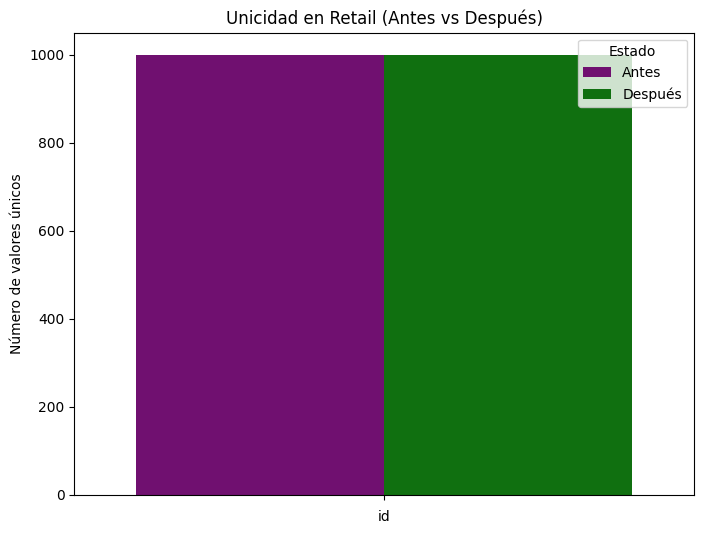

In [8]:
customer_og_unique_id = customer_og['id'].nunique()
customer_clean_unique_id = customer_clean['id'].nunique() if 'id' in customer_clean.columns else 0

customer_data = {
    'Columna': ['id', 'id'],
    'Estado': ['Antes', 'Después'],
    'Unicidad': [customer_og_unique_id, customer_clean_unique_id]
}
customer_df = pd.DataFrame(customer_data)

# Graficar
plt.figure(figsize=(8, 6))
sns.barplot(
    data=customer_df,  
    y='Unicidad', 
    hue='Estado', 
    palette={'Antes': 'purple', 'Después': 'green'}
)

plt.title('Unicidad en Retail (Antes vs Después)')
plt.ylabel('Número de valores únicos')
plt.xlabel('id')
plt.legend(title='Estado', loc='upper right')  # leyenda a un lado
plt.show()


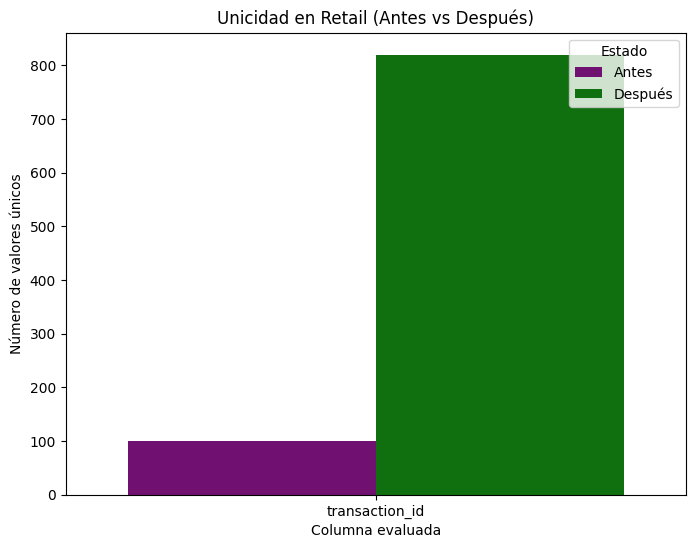

In [9]:
# Comparación usando 'transaction_id'
retail_clean_unique_id = retail_clean['transaction_id'].nunique() if 'transaction_id' in retail_clean.columns else 0
retail_og_unique_id = retail_og['customer_id'].nunique()
# Crear DataFrame con columnas separadas: columna analizada + estado (antes/después)
retail_data = {
    'Columna': ['transaction_id', 'transaction_id'],
    'Estado': ['Antes', 'Después'],
    'Unicidad': [
        retail_og_unique_id, retail_clean_unique_id,
    ]
}
retail_df = pd.DataFrame(retail_data)

# Graficar
plt.figure(figsize=(8, 6))
sns.barplot(
    data=retail_df, 
    x='Columna', 
    y='Unicidad', 
    hue='Estado', 
    palette={'Antes': 'purple', 'Después': 'green'}
)

plt.title('Unicidad en Retail (Antes vs Después)')
plt.ylabel('Número de valores únicos')
plt.xlabel('Columna evaluada')
plt.legend(title='Estado', loc='upper right')  # leyenda a un lado
plt.show()

## Fechas

En esta sección, se evalúan los formatos de las fechas en los datos originales y limpios. Se identifican los formatos más comunes antes de la limpieza y se analiza la distribución temporal de los registros después de la limpieza. Los gráficos incluyen barras para los formatos detectados y barras para la distribución por año.

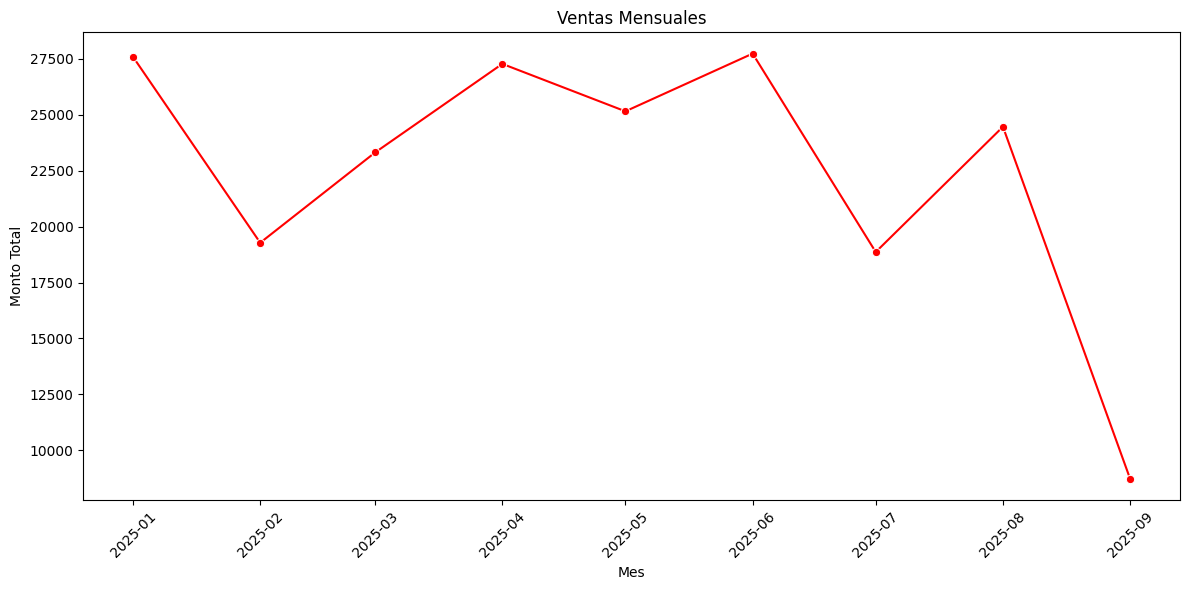

In [10]:
retail_clean['purchase_date'] = pd.to_datetime(retail_clean['purchase_date'])
ventas_mensuales = retail_clean.groupby(retail_clean['purchase_date'].dt.to_period('M'))['amount'].sum()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x=ventas_mensuales.index, y=ventas_mensuales.values, marker='o', color = "red")
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Monto Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Amount

En esta sección, se compara la distribución del monto de ventas antes y después de la limpieza. Se utiliza un boxplot para visualizar las diferencias en las distribuciones, desglosadas por categoría de producto. Esto permite identificar posibles anomalías o mejoras en los datos limpios.

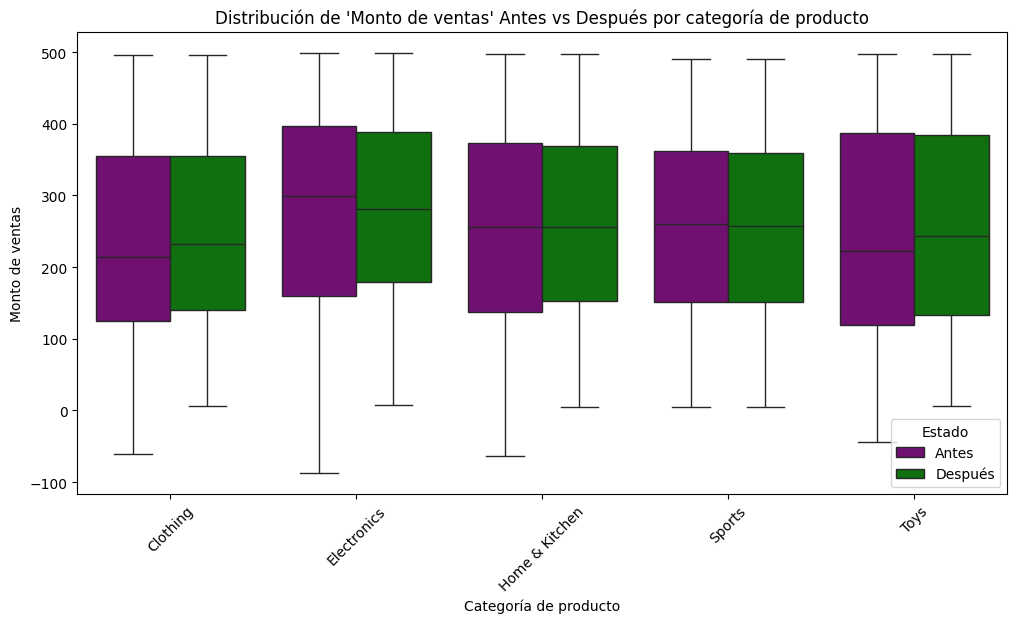

In [11]:
retail_amount_before = retail_og['amount']
retail_amount_after = retail_clean['amount']

# Crear DataFrame
amount_df = pd.DataFrame({
	'Antes': retail_amount_before,
	'Después': retail_amount_after,
	'product_category': retail_og['product_category']
})

# Convertir a formato long (melt)
amount_long = amount_df.melt(
	id_vars='product_category',
	value_vars=['Antes', 'Después'],
	var_name='Estado',
	value_name='Monto de ventas'
)

# Asegurar que 'Monto de ventas' sea numérico
amount_long['Monto de ventas'] = pd.to_numeric(amount_long['Monto de ventas'], errors='coerce')

# Boxplot comparativo filtrado por categoría
plt.figure(figsize=(12,6))
sns.boxplot(
	data=amount_long,
	x='product_category',
	y='Monto de ventas',
	hue='Estado',
	palette=['purple', 'green']
)
plt.title("Distribución de 'Monto de ventas' Antes vs Después por categoría de producto")
plt.ylabel("Monto de ventas")
plt.xlabel("Categoría de producto")
plt.xticks(rotation=45)
plt.legend(title='Estado')
plt.show()

## Age

En esta sección, se compara la distribución de edades antes y después de la limpieza. Se utiliza un histograma para visualizar las frecuencias de las edades, lo que permite identificar cambios significativos en la calidad de los datos.

C:\Users\juana\AppData\Local\Temp\ipykernel_26320\1580668227.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


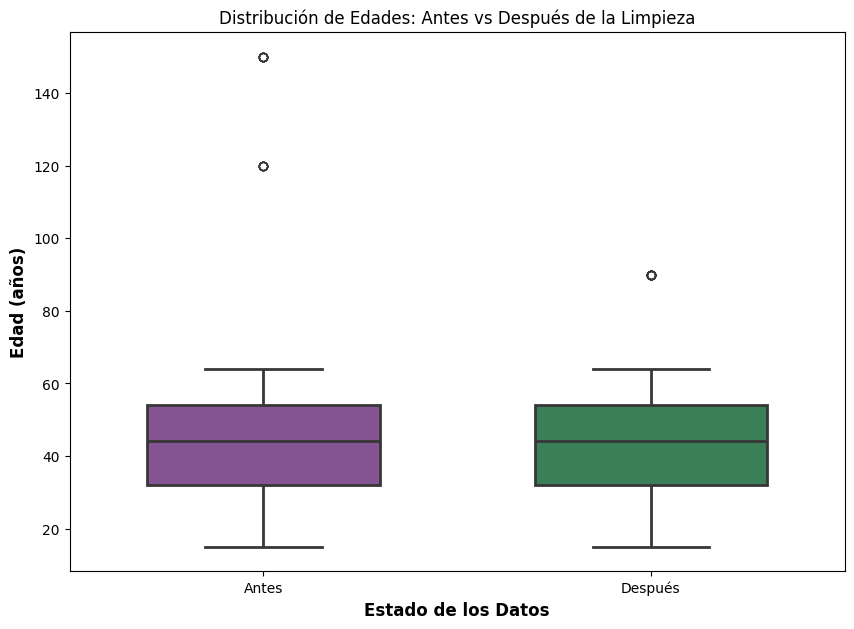

In [12]:
# Preparar datos para comparación de edades
ages_before = customer_og['age'].dropna()
ages_after = customer_clean['age'].dropna()

# Crear DataFrame en formato long para seaborn
ages_data = []
ages_data.extend([{'Edad': age, 'Estado': 'Antes'} for age in ages_before])
ages_data.extend([{'Edad': age, 'Estado': 'Después'} for age in ages_after])
ages_df = pd.DataFrame(ages_data)

# Configurar el estilo
plt.style.use('default')
plt.figure(figsize=(10, 7))

# Crear boxplot con seaborn para mejor estética
sns.boxplot(
    data=ages_df, 
    x='Estado', 
    y='Edad',
    palette=['#8B4A9C', '#2E8B57'],  # Morado y verde
    width=0.6,
    linewidth=2
)

# Personalizar el gráfico
plt.title("Distribución de Edades: Antes vs Después de la Limpieza")
plt.ylabel("Edad (años)", fontsize=12, fontweight='bold')
plt.xlabel("Estado de los Datos", fontsize=12, fontweight='bold')
plt.show()

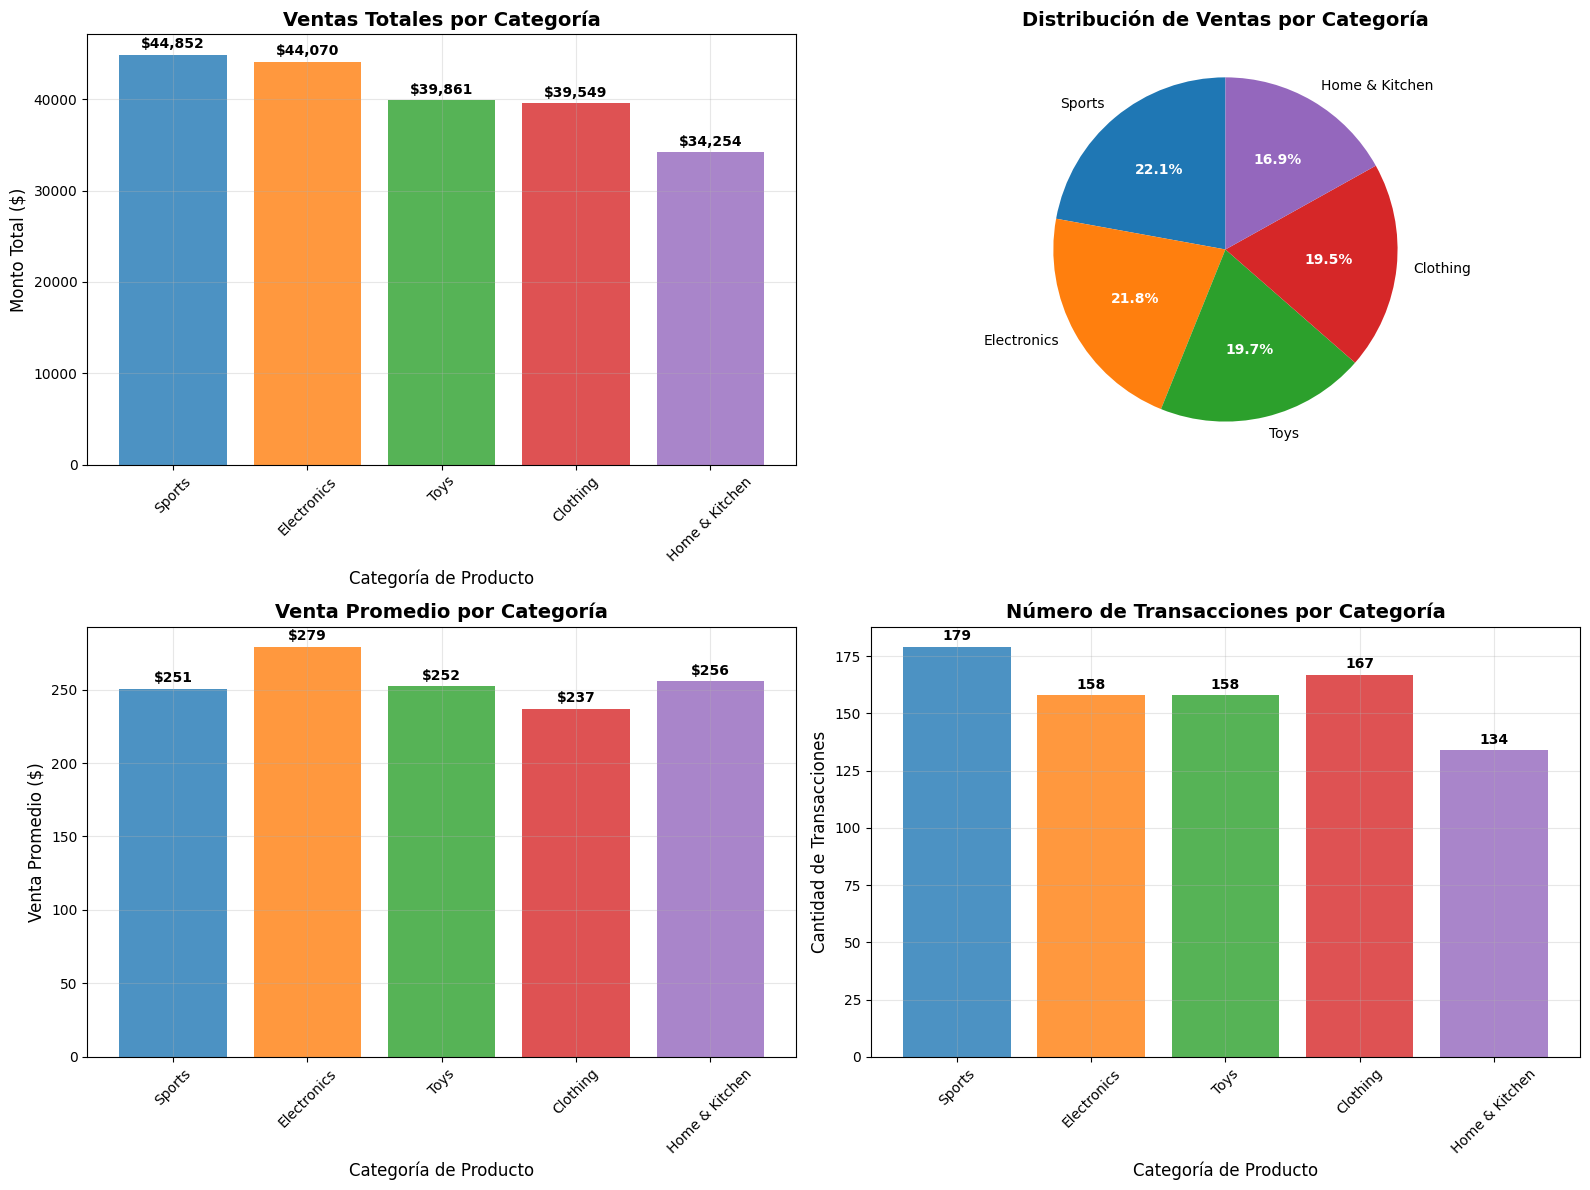

In [13]:
# Análisis de ventas por categoría de producto
ventas_por_categoria = retail_clean.groupby('product_category')['amount'].agg(['sum', 'mean', 'count']).reset_index()
ventas_por_categoria.columns = ['Categoría', 'Ventas Totales', 'Venta Promedio', 'Número de Transacciones']
ventas_por_categoria = ventas_por_categoria.sort_values('Ventas Totales', ascending=False)

# Crear subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Barras de ventas totales por categoría
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
bars1 = ax1.bar(ventas_por_categoria['Categoría'], ventas_por_categoria['Ventas Totales'], 
                color=colors[:len(ventas_por_categoria)], alpha=0.8)

# Añadir valores sobre las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

ax1.set_title('Ventas Totales por Categoría', fontsize=14, fontweight='bold')
ax1.set_ylabel('Monto Total ($)', fontsize=12)
ax1.set_xlabel('Categoría de Producto', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Gráfico de pastel
wedges, texts, autotexts = ax2.pie(ventas_por_categoria['Ventas Totales'], 
                                   labels=ventas_por_categoria['Categoría'],
                                   autopct='%1.1f%%',
                                   colors=colors[:len(ventas_por_categoria)],
                                   startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax2.set_title('Distribución de Ventas por Categoría', fontsize=14, fontweight='bold')

# Gráfico 3: Venta promedio por categoría
bars3 = ax3.bar(ventas_por_categoria['Categoría'], ventas_por_categoria['Venta Promedio'], 
                color=colors[:len(ventas_por_categoria)], alpha=0.8)

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

ax3.set_title('Venta Promedio por Categoría', fontsize=14, fontweight='bold')
ax3.set_ylabel('Venta Promedio ($)', fontsize=12)
ax3.set_xlabel('Categoría de Producto', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Gráfico 4: Número de transacciones por categoría
bars4 = ax4.bar(ventas_por_categoria['Categoría'], ventas_por_categoria['Número de Transacciones'], 
                color=colors[:len(ventas_por_categoria)], alpha=0.8)

for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax4.set_title('Número de Transacciones por Categoría', fontsize=14, fontweight='bold')
ax4.set_ylabel('Cantidad de Transacciones', fontsize=12)
ax4.set_xlabel('Categoría de Producto', fontsize=12)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8827a6c5-c255-41ba-9603-9339500bd604' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>